A long standing dependency of MotionClouds is MayaVi. While powerful, it is tedious to compile and may discourage new users.
We are trying here to show some attempts to do the same with matplotlib or any other library.


<!-- TEASER_END -->

In [1]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

## Testing 3D plots in pylab

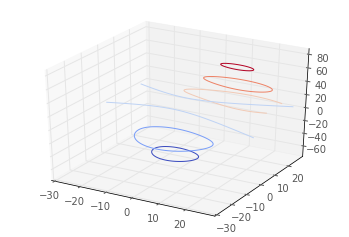

In [2]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z, cmap=cm.coolwarm)
ax.clabel(cset, fontsize=9, inline=1)


In [3]:
X, Y, Z

(array([[-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
        [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
        [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
        ..., 
        [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
        [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
        [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5]]),
 array([[-30. , -30. , -30. , ..., -30. , -30. , -30. ],
        [-29.5, -29.5, -29.5, ..., -29.5, -29.5, -29.5],
        [-29. , -29. , -29. , ..., -29. , -29. , -29. ],
        ..., 
        [ 28.5,  28.5,  28.5, ...,  28.5,  28.5,  28.5],
        [ 29. ,  29. ,  29. , ...,  29. ,  29. ,  29. ],
        [ 29.5,  29.5,  29.5, ...,  29.5,  29.5,  29.5]]),
 array([[-0.01 , -0.011, -0.013, ..., -0.015, -0.013, -0.011],
        [-0.011, -0.013, -0.015, ..., -0.018, -0.015, -0.013],
        [-0.013, -0.015, -0.018, ..., -0.02 , -0.018, -0.015],
        ..., 
        [-0.012, -0.014, -0.017, ...,  0.029,  0.03 ,  0.031],
        [-0.011, -

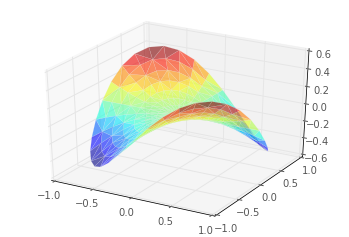

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

n_angles = 36
n_radii = 8

# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii = np.linspace(0.125, 1.0, n_radii)

# An array of angles
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius
angles = np.repeat(angles[...,np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords
# (0, 0) is added here. There are no duplicate points in the (x, y) plane
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Pringle surface
z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2, alpha=.6)


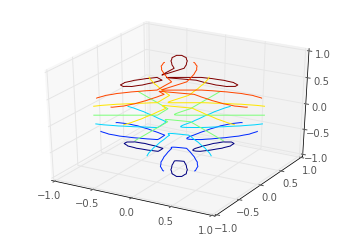

In [5]:
"""
Contour plots of unstructured triangular grids.
"""
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as tri
import numpy as np
import math

# First create the x and y coordinates of the points.
n_angles = 48
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[...,np.newaxis], n_radii, axis=1)
angles[:,1::2] += math.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(angles*3.0)).flatten()

# Create a custom triangulation
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
#xmid = x[triang.triangles].mean(axis=1)
#ymid = y[triang.triangles].mean(axis=1)
#mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
#triang.set_mask(mask)

plt.figure()
plt.gca(projection='3d')
plt.tricontour(triang, z)


FPS: 191.768541


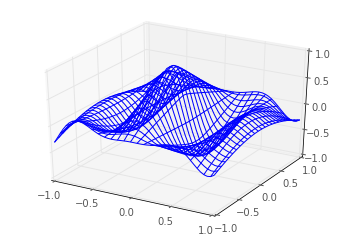

In [6]:
from __future__ import print_function
"""
A very simple 'animation' of a 3D plot
"""
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import time

def generate(X, Y, phi):
    R = 1 - np.sqrt(X**2 + Y**2)
    return np.cos(2 * np.pi * X + phi) * R

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = np.linspace(-1, 1, 50)
ys = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xs, ys)
Z = generate(X, Y, 0.0)

wframe = None
tstart = time.time()
for phi in np.linspace(0, 360 / 2 / np.pi, 100):

    oldcol = wframe

    Z = generate(X, Y, phi)
    wframe = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)

    # Remove old line collection before drawing
    if oldcol is not None:
        ax.collections.remove(oldcol)

    plt.pause(.001)

print ('FPS: %f' % (100 / (time.time() - tstart)))

However, there is nothing really easy yet to produce a contour plot of a scalar field, as mayavi does very well. 

## and vispy?

In [another post](https://laurentperrinet.github.io/sciblog/posts/2014-10-08_moving-from-mayavi-to-matplotlib.html), we will try [vispy](http://vispy.org), a scientific visualisation library in python using opengl.